In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
import processing


In [8]:
name = ['RBC', 'Unlabeled THP-1', 'D2O-labeled THP-1', 'PLGA', 'CNP', 'D2O-labeled CNP'] #'RBC',

In [39]:
n_samples = int(input("Enter the number of samples: "))
crop_1 = 2700
crop_2 = 3100

sample_array = []
for sample in range(n_samples):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    sample_csv = filedialog.askopenfilename()

    sample_df= pd.read_csv(sample_csv)
    print(f'\nopening: {sample_csv}')
    wavenumbers = sample_df['wavenumber'].to_numpy()
    spectra_arr = sample_df.iloc[0:,1:].to_numpy()

    a = wavenumbers[wavenumbers > crop_1]
    c = a[a < crop_2]
    b = spectra_arr[wavenumbers > crop_1,:]
    b = b[a < crop_2,:]

    for idx, spectrum in enumerate(b.T):
        b[:,idx] = processing.normalize(spectrum)

    sample_array.append(b)



opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/1D Corrected/1D.csv

opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/2D Corrected/2D.csv

opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/3D Corrected/3D.csv

opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/4D Corrected/4D.csv

opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/5D Corrected/5D.csv

opening: /Users/jorgevillazon/Downloads/Liangfang 123456D/6D Corrected/6D.csv


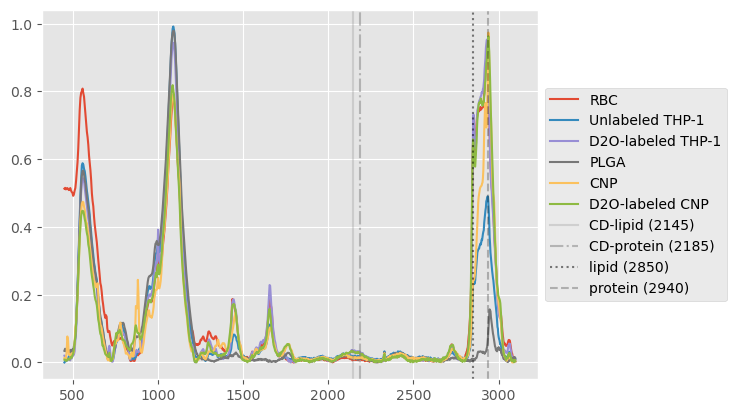

In [37]:
plt.style.use('ggplot')
for idx in range(len(sample_array)):
    temp = np.mean(sample_array[idx], axis=1)
    plt.plot(c, temp-np.min(temp), label=name[idx])

plt.axvline(2145, color='gray', linestyle='-', label='CD-lipid (2145)', alpha=0.25)
plt.axvline(2185, color='gray',  linestyle='-.', label='CD-protein (2185)', alpha=0.5)
plt.axvline(2850, color='black', linestyle=':', label='lipid (2850)', alpha=0.5)
plt.axvline(2940, color='black',  linestyle='--', label='protein (2940)', alpha=0.25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# plt.savefig('figure1.png')

In [7]:
len(name)

5

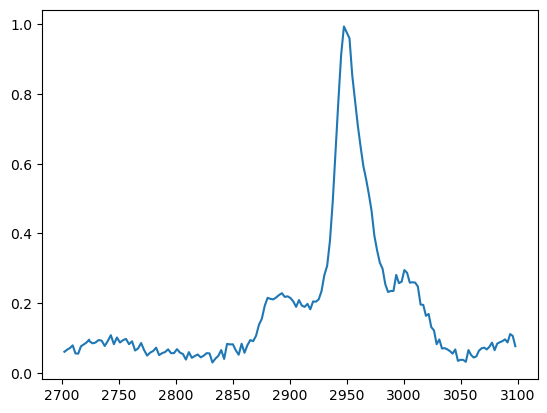

In [13]:
plt.plot(c, np.mean(sample_array[3][:,1:],axis=1))
plt.show()